In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import os

In [36]:
tags = ["numberckpt_010", "numberckpt_050", "numberckpt_200", "numberckpt_300", "numberckpt_391"]
caches = []
for tag in tags:
    with open(rf"C:\Users\t1526\Project\pdiff\Neural-Network-Diffusion\results\plot_{tag}.cache", "rb") as f:
        caches.append(pickle.load(f))

org_points = [cache[-6]["x"] for cache in caches]
gen_points = [cache[-5]["x"] for cache in caches]

org_data = pd.DataFrame({
    'Category': np.repeat(['10', '50', '200', '300', '400'], [len(i) for i in org_points]),
    'Value': np.concatenate(org_points, axis=0)
})
org_data[0] = 1.2

gen_data = pd.DataFrame({
    'Category': np.repeat(['10', '50', '200', '300', '400'], [len(i) for i in gen_points]),
    'Value': np.concatenate(gen_points, axis=0)
})

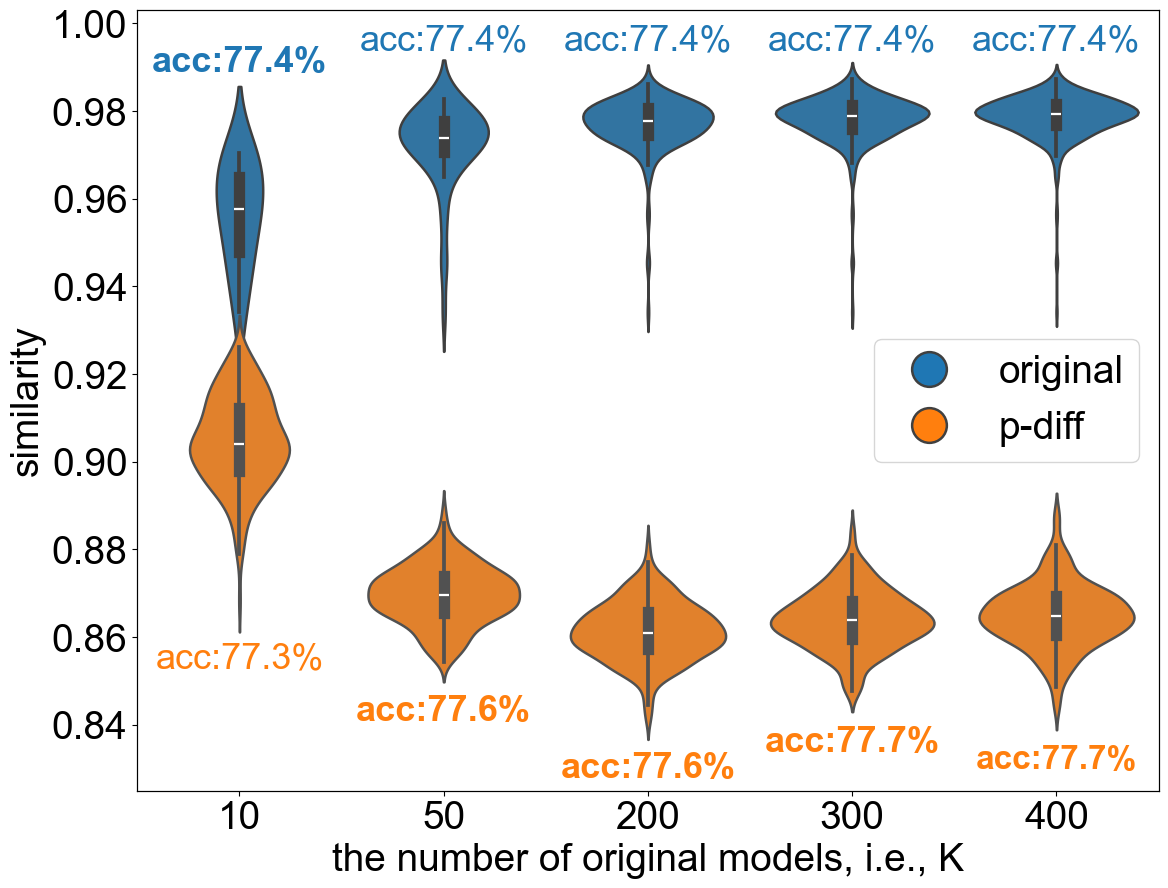

In [40]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Liberation Sans', 'Arial', 'DejaVu Sans', 'Helvetica']

fig, ax1 = plt.subplots(figsize=(12, 9))
ax2 = ax1.twinx()

sns.violinplot(x='Category', y='Value', data=org_data, ax=ax1, color='#1f77b4', linewidth=1.8)
sns.violinplot(x='Category', y='Value', data=gen_data, ax=ax2, color='#ff7f0e', linewidth=1.8)

ax2.set_ylim(0.825, 1.003)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_ylabel('')
ax2.set_yticklabels([])
ax2.tick_params(right=False)

ax1.set_ylim(0.825, 1.003)
ax1.tick_params(axis='both', which='major', labelsize=28)
ax1.set_ylabel("similarity", fontsize=28)
ax1.set_xlabel("the number of original models, i.e., K", fontsize=28)

ax1.annotate('acc:77.4%', xy=(0, 0.95), xytext=(0, 0.989), fontsize=26, color='#1f77b4', ha='center', weight='bold')
ax1.annotate('acc:77.4%', xy=(1, 0.95), xytext=(1, 0.994), fontsize=26, color='#1f77b4', ha='center')
ax1.annotate('acc:77.4%', xy=(2, 0.95), xytext=(2, 0.994), fontsize=26, color='#1f77b4', ha='center')
ax1.annotate('acc:77.4%', xy=(3, 0.95), xytext=(3, 0.994), fontsize=26, color='#1f77b4', ha='center')
ax1.annotate('acc:77.4%', xy=(4, 0.95), xytext=(4, 0.994), fontsize=26, color='#1f77b4', ha='center')
ax2.annotate('acc:77.3%', xy=(0, 0.85), xytext=(0, 0.853), fontsize=26, color='#ff7f0e', ha='center')
ax2.annotate('acc:77.6%', xy=(1, 0.85), xytext=(1, 0.841), fontsize=26, color='#ff7f0e', ha='center', weight='bold')
ax2.annotate('acc:77.6%', xy=(2, 0.85), xytext=(2, 0.828), fontsize=26, color='#ff7f0e', ha='center', weight='bold')
ax2.annotate('acc:77.7%', xy=(3, 0.85), xytext=(3, 0.834), fontsize=26, color='#ff7f0e', ha='center', weight='bold')
ax2.annotate('acc:77.7%', xy=(4, 0.85), xytext=(4, 0.830), fontsize=24, color='#ff7f0e', ha='center', weight='bold')

org_legend = plt.Line2D([0], [0], marker='o', color='w', 
                        markerfacecolor='#1f77b4', markersize=25, 
                        markeredgewidth=1.8, markeredgecolor="#404040", 
                        label='original')
gen_legend = plt.Line2D([0], [0], marker='o', color='w', 
                        markerfacecolor='#ff7f0e', markersize=25, 
                        markeredgewidth=1.8, markeredgecolor="#404040", 
                        label='p-diff')
ax1.legend(handles=[org_legend, gen_legend], loc='center right', fontsize=28)

plt.tight_layout()
plt.savefig("draw_vary_numebr_ckpt.pdf")